# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and Explore the EEG Data

In [2]:
df = pd.read_csv('EEG-HAR_Subject_3_Merged.csv')
print("Columns:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())
print(f"\nTotal shape: {df.shape[0]} rows × {df.shape[1]} columns")

Columns:
['Sample Index', 'EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2', 'EXG Channel 3', 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6', 'EXG Channel 7', 'EXG Channel 8', 'EXG Channel 9', 'EXG Channel 10', 'EXG Channel 11', 'EXG Channel 12', 'EXG Channel 13', 'EXG Channel 14', 'EXG Channel 15', 'Accel Channel 0', 'Accel Channel 1', 'Accel Channel 2', 'Not Used 1', 'Digital Channel 0 (D11)', 'Digital Channel 1 (D12)', 'Digital Channel 2 (D13)', 'Digital Channel 3 (D17)', 'Not Used 2', 'Digital Channel 4 (D18)', 'Analog Channel 0', 'Analog Channel 1', 'Analog Channel 2', 'Timestamp', 'Marker Channel', 'Timestamp (Formatted)', 'Activity', 'Timestamp_Gyro', 'Gyro X (°/s)', 'Gyro Y (°/s)', 'Gyro Z (°/s)', 'Activity_Label_x', 'Subject_ID_x', 'Timestamp_Accel', 'Accel X (g)', 'Accel Y (g)', 'Accel Z (g)', 'Activity_Label_y', 'Subject_ID_y']

First 5 rows:
   Sample Index  EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  \
0           6.0 -187500.022352 -187500.022352 -18750

# Count the Activity Labels

In [3]:
df = pd.read_csv('EEG-HAR_Subject_3_Merged.csv')
activity_counts = df['Activity'].value_counts()
print(activity_counts)

Activity
OpenBCISession_s3-light stationary cycling       67955
OpenBCISession_s3-seated medicine ball twists    58833
OpenBCISession_s3-side-stepping                  58046
OpenBCISession_s3-seated leg extensions          57736
OpenBCISession_s3-seated side bends              56890
OpenBCISession_s3-seated boxing hooks            56712
OpenBCISession_s3-chair squats                   56492
OpenBCISession_s3-standing heel to toe walk      56242
OpenBCISession_s3-marching in place              55731
OpenBCISession_s3-wall push-ups                  37925
Name: count, dtype: int64


# Extract EEG Data and Save to New File

In [4]:
df = pd.read_csv('EEG-HAR_Subject_3_Merged.csv')
eeg_columns = [f'EXG Channel {i}' for i in range(16)]
meta_columns = ['Subject_ID_x', 'Activity']
eeg_only_df = df[eeg_columns + meta_columns]
eeg_only_df.to_csv('EEG_Only_Subject3.csv', index=False)
print("Created: EEG_Only_Subject3.csv")
print(f"Shape: {eeg_only_df.shape}")
print(eeg_only_df.head())

Created: EEG_Only_Subject3.csv
Shape: (562562, 18)
   EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  EXG Channel 4  \
0 -187500.022352 -187500.022352 -187500.022352 -187500.022352 -187500.022352   
1 -187500.022352 -187500.022352 -187500.022352 -187500.022352 -187500.022352   
2 -187500.022352 -187500.022352 -187500.022352 -187500.022352 -187500.022352   
3 -187500.022352 -187500.022352 -187500.022352 -187500.022352 -187500.022352   
4 -187500.022352 -187500.022352 -187500.022352 -187500.022352 -187500.022352   

   EXG Channel 5  EXG Channel 6  EXG Channel 7  EXG Channel 8  EXG Channel 9  \
0 -183210.432018   22146.935421 -187500.022352   28596.352469 -180511.481227   
1 -183222.211387   22380.846427 -187500.022352   28492.729782 -180052.331692   
2 -183295.390999   22193.583512 -187500.022352   28642.106490 -180247.283607   
3 -183051.108784   22374.275014 -187500.022352   28487.499474 -179787.977611   
4 -183158.352454   22160.659392 -187500.022352   28649.862546 -17996

# Rename Columns and Save the Updated File

In [5]:
df = pd.read_csv('EEG_Only_Subject3.csv')
df = df.rename(columns={
    'Subject_ID_x': 'Subject_ID',
    'Activity': 'Activity_Label_OpenBCI'
})
df.to_csv('EEG_Only_Subject3.csv', index=False)
print("Columns renamed and file updated.")
print("Last 2 columns:", df.columns[-2:].tolist())
print("\nPreview of data:")
print(df.head())
print(f"\nTotal shape: {df.shape[0]} rows × {df.shape[1]} columns")

Columns renamed and file updated.
Last 2 columns: ['Subject_ID', 'Activity_Label_OpenBCI']

Preview of data:
   EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  EXG Channel 4  \
0 -187500.022352 -187500.022352 -187500.022352 -187500.022352 -187500.022352   
1 -187500.022352 -187500.022352 -187500.022352 -187500.022352 -187500.022352   
2 -187500.022352 -187500.022352 -187500.022352 -187500.022352 -187500.022352   
3 -187500.022352 -187500.022352 -187500.022352 -187500.022352 -187500.022352   
4 -187500.022352 -187500.022352 -187500.022352 -187500.022352 -187500.022352   

   EXG Channel 5  EXG Channel 6  EXG Channel 7  EXG Channel 8  EXG Channel 9  \
0 -183210.432018   22146.935421 -187500.022352   28596.352469 -180511.481227   
1 -183222.211387   22380.846427 -187500.022352   28492.729782 -180052.331692   
2 -183295.390999   22193.583512 -187500.022352   28642.106490 -180247.283607   
3 -183051.108784   22374.275014 -187500.022352   28487.499474 -179787.977611   
4 -183158.

# Display Unique Activity Labels

In [6]:
print(df['Activity_Label_OpenBCI'].unique())

['OpenBCISession_s3-seated leg extensions'
 'OpenBCISession_s3-wall push-ups' 'OpenBCISession_s3-seated boxing hooks'
 'OpenBCISession_s3-standing heel to toe walk'
 'OpenBCISession_s3-side-stepping' 'OpenBCISession_s3-seated side bends'
 'OpenBCISession_s3-chair squats'
 'OpenBCISession_s3-seated medicine ball twists'
 'OpenBCISession_s3-light stationary cycling'
 'OpenBCISession_s3-marching in place']


# Count Rows per Activity Label

In [7]:
activity_counts = df['Activity_Label_OpenBCI'].value_counts()
print("Number of rows per activity label:\n")
print(activity_counts)

Number of rows per activity label:

Activity_Label_OpenBCI
OpenBCISession_s3-light stationary cycling       67955
OpenBCISession_s3-seated medicine ball twists    58833
OpenBCISession_s3-side-stepping                  58046
OpenBCISession_s3-seated leg extensions          57736
OpenBCISession_s3-seated side bends              56890
OpenBCISession_s3-seated boxing hooks            56712
OpenBCISession_s3-chair squats                   56492
OpenBCISession_s3-standing heel to toe walk      56242
OpenBCISession_s3-marching in place              55731
OpenBCISession_s3-wall push-ups                  37925
Name: count, dtype: int64


# Plot Activity Counts

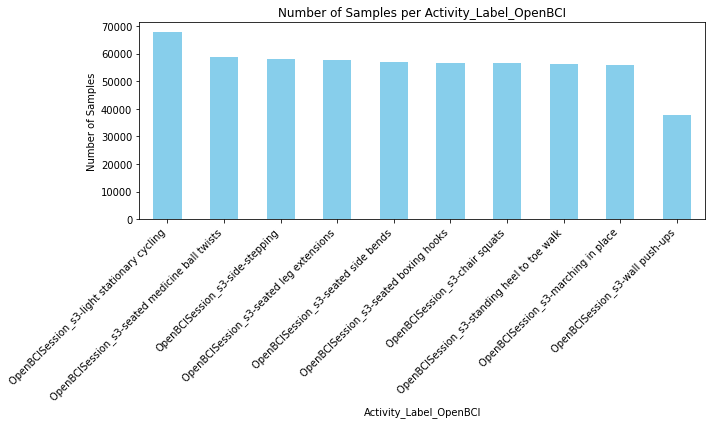

In [8]:
activity_counts = df['Activity_Label_OpenBCI'].value_counts()
plt.figure(figsize=(10,6))
activity_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Samples per Activity_Label_OpenBCI')
plt.xlabel('Activity_Label_OpenBCI')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Update Activity Labels and Save File

In [9]:
df = pd.read_csv('EEG_Only_Subject3.csv')

df = df.rename(columns={
    'Subject_ID_x': 'Subject_ID',
    'Activity': 'Activity_Label_OpenBCI'
})

df['Subject_ID'] = df['Subject_ID'].replace('Subject 3', 3).astype(int)

activity_mapping = {
    'OpenBCISession_s3-seated leg extensions': 'Seated Leg Extensions',
    'OpenBCISession_s3-marching in place': 'Marching in Place',
    'OpenBCISession_s3-wall push-ups': 'Wall Push-ups',
    'OpenBCISession_s3-seated boxing hooks': 'Seated Boxing Hooks',
    'OpenBCISession_s3-standing heel to toe walk': 'Standing Heel-to-Toe Walk',
    'OpenBCISession_s3-side-stepping': 'Side-Stepping',
    'OpenBCISession_s3-seated side bends': 'Seated Side Bends',
    'OpenBCISession_s3-seated medicine ball twists': 'Seated Medicine Ball Twists',
    'OpenBCISession_s3-chair squats': 'Chair Squats',
    'OpenBCISession_s3-light stationary cycling': 'Light Stationary Cycling'
}

df['Activity_Label_OpenBCI'] = df['Activity_Label_OpenBCI'].replace(activity_mapping)

df.to_csv('EEG_Only_Subject3.csv', index=False)

print("File updated successfully.")
print("Subject_ID is numeric:", df['Subject_ID'].dtype)
print("Unique activity labels now:")
print(df['Activity_Label_OpenBCI'].unique())
print(f"\nFinal shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nPreview of data:")
print(df.head())

/tmp/ipykernel_931063/3997920168.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Subject_ID'] = df['Subject_ID'].replace('Subject 3', 3).astype(int)


File updated successfully.
Subject_ID is numeric: int64
Unique activity labels now:
['Seated Leg Extensions' 'Wall Push-ups' 'Seated Boxing Hooks'
 'Standing Heel-to-Toe Walk' 'Side-Stepping' 'Seated Side Bends'
 'Chair Squats' 'Seated Medicine Ball Twists' 'Light Stationary Cycling'
 'Marching in Place']

Final shape: 562562 rows × 18 columns

Preview of data:
   EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  EXG Channel 4  \
0 -187500.022352 -187500.022352 -187500.022352 -187500.022352 -187500.022352   
1 -187500.022352 -187500.022352 -187500.022352 -187500.022352 -187500.022352   
2 -187500.022352 -187500.022352 -187500.022352 -187500.022352 -187500.022352   
3 -187500.022352 -187500.022352 -187500.022352 -187500.022352 -187500.022352   
4 -187500.022352 -187500.022352 -187500.022352 -187500.022352 -187500.022352   

   EXG Channel 5  EXG Channel 6  EXG Channel 7  EXG Channel 8  EXG Channel 9  \
0 -183210.432018   22146.935421 -187500.022352   28596.352469 -180511.48122

# Count the Activity Labels in Updated Data

In [10]:
df = pd.read_csv('EEG_Only_Subject3.csv')
activity_counts = df['Activity_Label_OpenBCI'].value_counts()
print(activity_counts)

Activity_Label_OpenBCI
Light Stationary Cycling       67955
Seated Medicine Ball Twists    58833
Side-Stepping                  58046
Seated Leg Extensions          57736
Seated Side Bends              56890
Seated Boxing Hooks            56712
Chair Squats                   56492
Standing Heel-to-Toe Walk      56242
Marching in Place              55731
Wall Push-ups                  37925
Name: count, dtype: int64


# Map Activity Labels to Numeric Values and Save File

In [11]:
df = pd.read_csv('EEG_Only_Subject3.csv')
df = df.rename(columns={
    'Subject_ID_x': 'Subject_ID',
    'Activity': 'Activity_Label_OpenBCI'
})
df['Subject_ID'] = df['Subject_ID'].replace('Subject 3', 3).astype(int)
activity_mapping_to_numeric = {
    'Seated Leg Extensions': 1,
    'Marching in Place': 2,
    'Wall Push-ups': 3,
    'Seated Boxing Hooks': 4,
    'Standing Heel-to-Toe Walk': 5,
    'Side-Stepping': 6,
    'Seated Side Bends': 7,
    'Seated Medicine Ball Twists': 8,
    'Chair Squats': 9,
    'Light Stationary Cycling': 10
}
df['Activity_Label_OpenBCI'] = df['Activity_Label_OpenBCI'].replace(activity_mapping_to_numeric)
df.to_csv('EEG_Only_Subject3_Updated.csv', index=False)
print("File updated successfully.")
print("Subject_ID is numeric:", df['Subject_ID'].dtype)
print("Unique activity labels now (numeric):")
print(df['Activity_Label_OpenBCI'].unique())
print(f"\nFinal shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nPreview of data:")
print(df.head())

/tmp/ipykernel_931063/2771219719.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Activity_Label_OpenBCI'] = df['Activity_Label_OpenBCI'].replace(activity_mapping_to_numeric)


File updated successfully.
Subject_ID is numeric: int64
Unique activity labels now (numeric):
[ 1  3  4  5  6  7  9  8 10  2]

Final shape: 562562 rows × 18 columns

Preview of data:
   EXG Channel 0  EXG Channel 1  EXG Channel 2  EXG Channel 3  EXG Channel 4  \
0 -187500.022352 -187500.022352 -187500.022352 -187500.022352 -187500.022352   
1 -187500.022352 -187500.022352 -187500.022352 -187500.022352 -187500.022352   
2 -187500.022352 -187500.022352 -187500.022352 -187500.022352 -187500.022352   
3 -187500.022352 -187500.022352 -187500.022352 -187500.022352 -187500.022352   
4 -187500.022352 -187500.022352 -187500.022352 -187500.022352 -187500.022352   

   EXG Channel 5  EXG Channel 6  EXG Channel 7  EXG Channel 8  EXG Channel 9  \
0 -183210.432018   22146.935421 -187500.022352   28596.352469 -180511.481227   
1 -183222.211387   22380.846427 -187500.022352   28492.729782 -180052.331692   
2 -183295.390999   22193.583512 -187500.022352   28642.106490 -180247.283607   
3 -183051.108784

# Count and Sort Activity Labels (Numeric)

In [12]:
df = pd.read_csv('EEG_Only_Subject3_Updated.csv')

activity_counts = df['Activity_Label_OpenBCI'].value_counts().sort_index()

print("Unique activity labels and their counts (sorted 1 → 10):")
print(activity_counts)
print(f"\nTotal count: {activity_counts.sum()}")

Unique activity labels and their counts (sorted 1 → 10):
Activity_Label_OpenBCI
1     57736
2     55731
3     37925
4     56712
5     56242
6     58046
7     56890
8     58833
9     56492
10    67955
Name: count, dtype: int64

Total count: 562562
